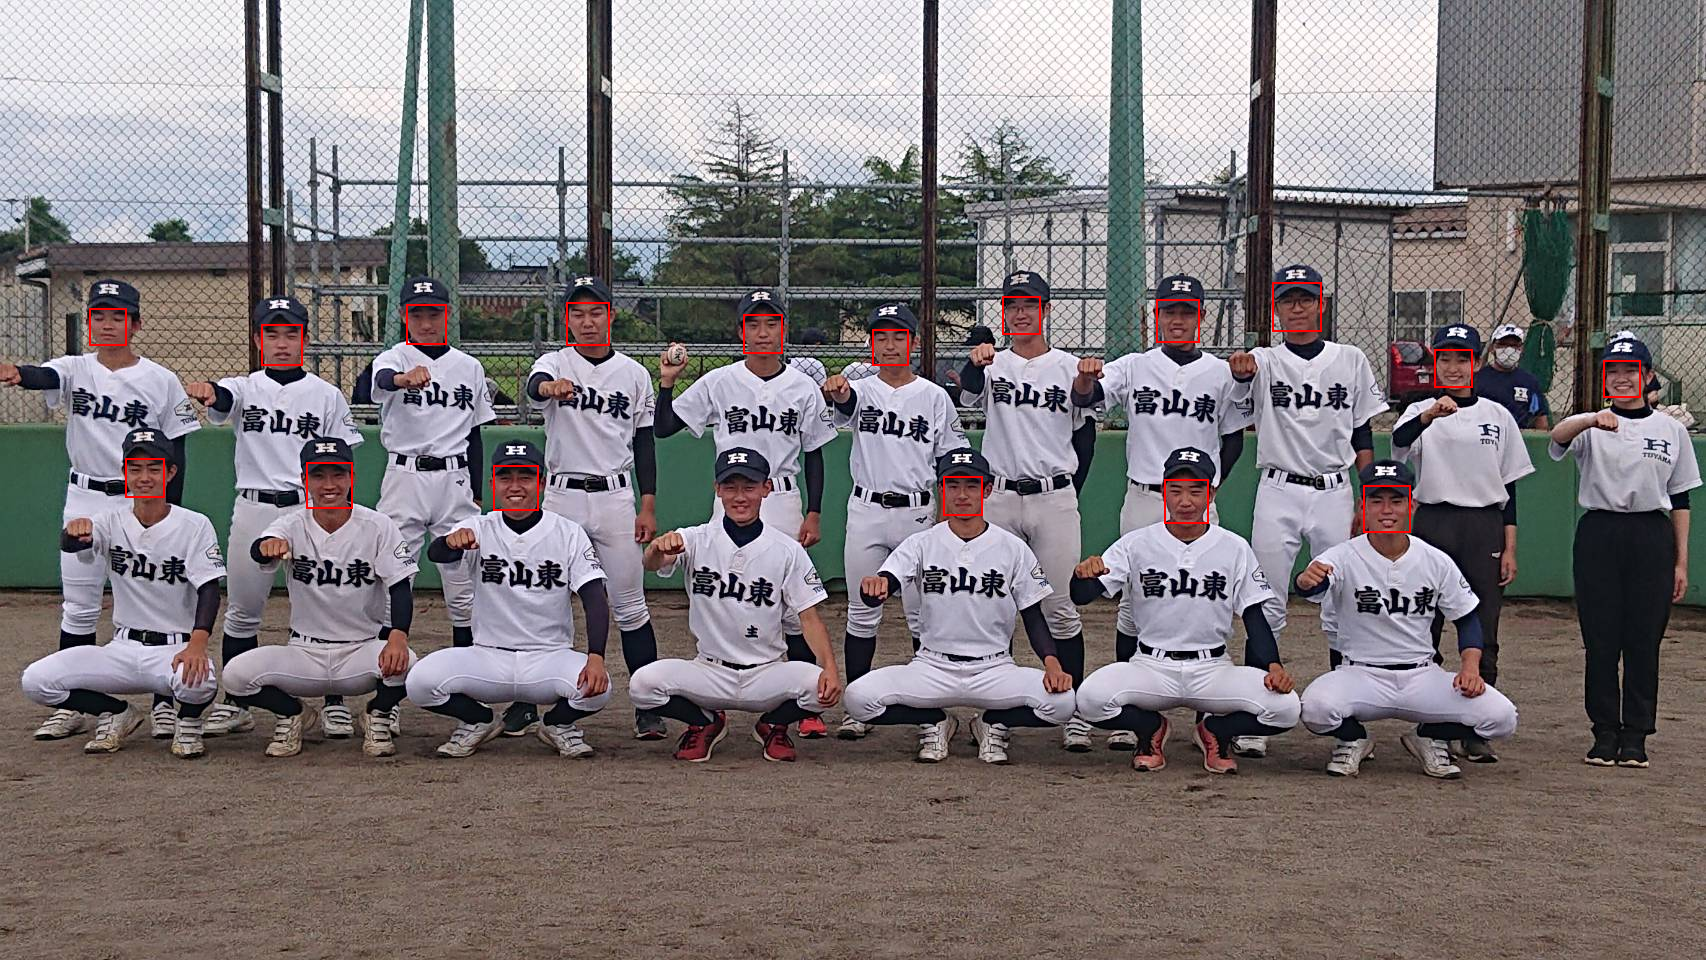

In [4]:
import requests
from PIL import Image
from PIL import ImageDraw
import io

subscription_key = "658a4bb366d048ecad727d04b6a808e8"
assert subscription_key

face_api_url = 'https://20211130tomoaki.cognitiveservices.azure.com/face/v1.0/detect'

img = Image.open('1625914935612.jpg')

with io.BytesIO() as output:
    img.save(output,format="JPEG")
    binary_img = output.getvalue()

headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': subscription_key
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age,gender,headPose,smile,facialHair,glasses,emotion,hair,makeup,occlusion,accessories,blur,exposure,noise'
}

res = requests.post(face_api_url, params=params, headers=headers,data=binary_img)
results = res.json()

for result in results:
    rect = result['faceRectangle']
    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'],rect['top']),(rect['left']+rect['width'], rect['top']+rect['height'])], fill=None, outline='red', width=2)
img

In [ ]:
import io